
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Trabajo práctico entregable - Parte 2

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
from scipy import stats

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [4]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [5]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [6]:
alpha = 0.05

In [7]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

### Solución

El parámetro a estimar es la diferencia de medias. Se calculan las medias de los dos grupos de variables y
luego se efectua la resta

In [8]:
media_grupoA = groupA.mean()
media_grupoB = groupB.mean()

print(media_grupoA)
print(media_grupoB)

101481.62434267912
78219.25094276095


In [12]:
dif_medias_grupoAB = media_grupoA - media_grupoB
dif_medias_grupoAB

std_grupoA = groupA.std()
std_grupoB = groupB.std()

print(std_grupoA)
print(std_grupoB)

print(len(groupA))

print(len(groupB))

102215.30468444867
56515.32732350074
4815
891


Se genera una muestra del grupo A, para luego calcular el Estadístico. En este supuesto se utilizará el Estadśitico Media Muestral

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='Count'>

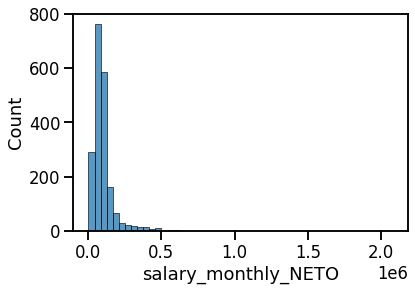

In [13]:
n_A = 2000

# Generamos muestra del grupo A
muestra_grupoA=groupA.sample(n_A, replace=False) # muestra de tamaño n

seaborn.histplot(muestra_grupoA, bins=50)

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='Count'>

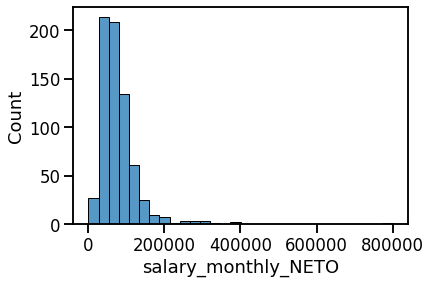

In [15]:
# Se calcula el estadistico para la muestra del grupo A

# Estimador media muestral grupo A
promedio_muestraA = muestra_grupoA.mean()
promedio_muestraA

# Se genera una muestra del grupo B, para luego calcular el Estadístico.

# Muestra grupo B
n_B=700
muestra_grupoB=groupB.sample(n_B, replace=False) # muestra de tamaño n

seaborn.histplot(muestra_grupoB, bins=30)

In [16]:
# Se calcula el estadistico para la muestra del grupo B

# Estimador media muestral grupo B
promedio_muestraB = muestra_grupoB.mean()
promedio_muestraB

print(muestra_grupoA.mean())
print(muestra_grupoB.mean())

100289.066565
78239.3591


In [17]:
# Calculados los estadísticos de cada grupo, se procede a calcular la Estimación Puntual
# Para el parámetro diferencia de medias

# Estimación puntual 
dif_medias_muestraAB = muestra_grupoA.mean()-muestra_grupoB.mean()
dif_medias_muestraAB

22049.707465

Intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB)

In [19]:
# Se calculan las varianzas de las muestras para determinar cómo calcular el estadístico pivote

print(muestra_grupoA.var())
print(muestra_grupoB.var())

grados_de_libertad = ((muestra_grupoA.std()/n_A+muestra_grupoB.std()/n_B)**2)/(((muestra_grupoA.std()/n_A)**2)/n_A-1+((muestra_grupoB.std()/n_B)**2)/n_B-1)
grados_de_libertad

std_A=muestra_grupoA.std()
std_B=muestra_grupoB.std()

9313902302.56884
2912449180.602014


Para calcular el intervalo de confianza de nivel 1-alpha para diferencia de medias se aplica el método Weltch ya que las muestras tienen varianza diferente,

El método que utiliza t de student para el calculo de los intervalos Inferior y Superior

In [20]:
# El nivel del intervalo es de 1-0.05=0.95
alpha = 0.05
t_score = 1.96

# Se calculan los intervalos
estadistico_liminf =(promedio_muestraA-promedio_muestraB)-t_score*numpy.sqrt(std_A/n_A+std_B/n_B)
estadistico_limsup =(promedio_muestraA-promedio_muestraB)+t_score*numpy.sqrt(std_A/n_A+std_B/n_B)

long_intervalo =estadistico_limsup-estadistico_liminf
long_intervalo

43.88827425822819

¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

Este intervalo de confianza de nivel 0.95, sirve para confirmar o rechazar la hipotesis nula que se plantee en el test de hipótesis.

Del intervalo de confianza de nivel 0.95 se deduce que la probabilidad de que el parámetro a estimar se ubique dentro de de los límites del intérvalo es del 95%, y solo en un 5% de casos el parámetro quedará por fuera del intervalo

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


**Hipótesis nula (H 0 ) : u A = u B,** "Las medias de los salarios entre los grupos A y B son iguales"

**Hipótesis alternativa (H A ) : u A ≠ u B** "Las medias de los salarios entre los grupos A y B no son iguales"

El estadistico a utilizar dependera de la homogeneidad de varianzas, también conocido como supuesto de homocedasticidad, que considera 
que la varianza es constante (no varía) entre diferentes grupos(A y B). Cuando la condición de homocedasticidad no se cumple, se 
utiliza el término heterocedasticidad.
  

Existen diferentes test que permiten evaluar si las observaciones proceden de poblaciones con la misma varianza. Todos ellos consideran
como hipótesis nula que la varianza es igual entre los grupos y como hipótesis alternativa que no lo es. La diferencia entre ellos es el
estadístico de centralidad que utilizan:
​

- Los test que utilizan la media de la varianza son los que mayor poder estadístico consiguen cuando los datos siguen distribuciones normales.
- Los test que utilizan la mediana de la varianza consiguen mejores resultados cuando los datos siguen distribuciones asimétricas o se alejan 
de la normalidad.
​

Si no se puede alcanzar cierta seguridad de que las poblaciones que se comparan son de tipo normal, es recomendable recurrir a tests que comparen
la mediana de la varianza.
​

En primer lugar se procederá a aplicar el test de Levene, el test de Bartlett y el test de Fligner-Killeen  para determinar la homocedasticidad de
las varianzas de los grupos A y B.

#### Contraste de hipótesis

El test de Levene, el test de Bartlett y el test de Fligner-Killeen son tres de los test de hipótesis más empleados comparar la varianza entre grupos. 
En todos ellos, se considera como hipótesis nula que los datos proceden de distribuciones con la misma varianza (homocedasticidad). Por lo tanto, si 
el p-value es menor que un determinado valor (típicamente 0.05), entonces se considera que hay evidencias suficientes para rechazar la homocedasticidad
en favor de la heterocedasticidad.
​

El test de Levene y el test de Fligner-Killeen (este último no paramétrico) son más robustos que el test de Bartlett ante la falta de normalidad, por
lo que suele aconsejarse su uso. Además, tanto el test de Levene como el de Bartlett permiten elegir entre diferentes estadísticos de centralidad: 
mediana (por defecto), media, media truncada. Esto es importante a la hora de contrastar la homocedasticidad dependiendo de si los grupos se distribuyen
de forma normal o no.
​

Si se tiene seguridad de que las muestras a comparar proceden de poblaciones que siguen una distribución normal, es recomendable el test de Bartlett. 
Si no se tiene la seguridad de que las poblaciones de origen son normales, se recomiendan el test de Leven utilizando la mediana o el test no paramétrico
Fligner-Killeen que también se basa en la mediana.
  

In [21]:
# Levene test

levene_test = stats.levene(muestra_grupoA, muestra_grupoB, center='median')
print(levene_test)

LeveneResult(statistic=19.749409346239027, pvalue=9.185052682463106e-06)


In [22]:
# Bartlett test

bartlett_test = stats.bartlett(muestra_grupoA, muestra_grupoB)
print(bartlett_test)

BartlettResult(statistic=283.3834566379278, pvalue=1.3749845933222563e-63)


In [24]:
# Fligner test

fligner_test = stats.fligner(muestra_grupoA, muestra_grupoB, center='median')
print(fligner_test)

FlignerResult(statistic=30.561369532604225, pvalue=3.2347068473105065e-08)


Todos  los test muestran evidencias para rechazar la hipótesis de que los dos grupos tienen la misma varianza, homocedasticidad. p-value < 0.05.

Por lo tanto el estadístico adecuado para la prueba de hipótesis de las diferencias de Medias es t de Welch.

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

Como se indico anteriormente se utilizará la prueba t de Welch de forma predeterminada, ya que funciona mejor que la prueba t de Student siempre que los tamaños de muestra y las varianzas sean desiguales entre los grupos, y da el mismo resultado cuando los tamaños de muestra y las varianzas son iguales

**Prueba t de Welch**

La prueba t de Welch es una prueba univariante no paramétrica que prueba una diferencia significativa entre la media de dos grupos no relacionados. 

Es una alternativa a la prueba t de Student cuando se viola el supuesto de igualdad de varianzas.

**SUPUESTOS DE LA PRUEBA T DE WELCH**

Como toda prueba, esta prueba de estadística inferencial tiene suposiciones. 

Los supuestos que deben cumplir los datos para que los resultados de la prueba sean válidos son:

- La variable independiente  es categórica con al menos dos niveles (grupos A y B)

- La variable dependiente  es continua y se mide en una escala de intervalo o razón (salario)

- La distribución de los dos grupos debe seguir la distribución normal. (Se suponen distribuciones normales)

- Para realizar una prueba t de Welch, se necesita usar el método stats.ttest_ind() mientras se pasa "False" en el argumento "equal_var=".

In [25]:
welch_test = stats.ttest_ind(muestra_grupoA, muestra_grupoB,nan_policy='omit', equal_var = False)
print(welch_test)

Ttest_indResult(statistic=7.425536061856788, pvalue=1.6015847846963576e-13)


### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [26]:
from statsmodels.stats.power import tt_ind_solve_power

In [27]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

In [ ]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.
